In [0]:
import tensorflow as tf
import keras
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
import matplotlib.pyplot as plt
%matplotlib inline
from keras import backend as K

Using TensorFlow backend.


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1) #transform 2D 28x28 matrix to 3D (28x28x1) matrix
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255 #inputs have to be between [0, 1]
x_test /= 255

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_merged=np.zeros([40000,28,28,1])
y_merged=np.zeros([40000,2])
x_testing=np.zeros([8000,28,28,1])
y_testing=np.zeros([8000,2])


for i in range(8000):
  x_testing[i]=np.maximum(x_test[i],x_test[i+7])
  y_testing[i][0]=y_test[i]
  y_testing[i][1]=y_test[i+7]

for i in range(40000):
  x_merged[i]=np.maximum(x_train[i],x_train[i+5])
  y_merged[i][0]=y_train[i]
  y_merged[i][1]=y_train[i+5]
  #x_unmerged[i,0:,0:,0]=x_train[i].reshape(28,28)
  #x_unmerged[i,0:,0:,1]=x_train[i+5].reshape(28,28)
      

 
x_merged.shape

(40000, 28, 28, 1)

[5. 2.]


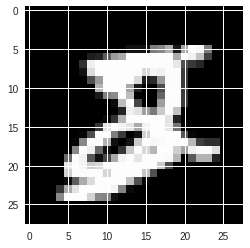

----------------------------
[0. 1.]


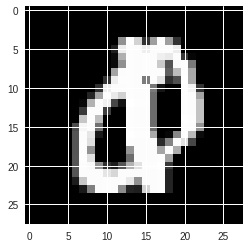

----------------------------
[4. 3.]


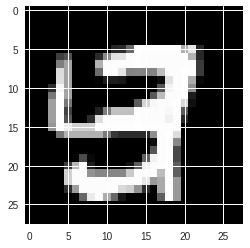

----------------------------
[1. 1.]


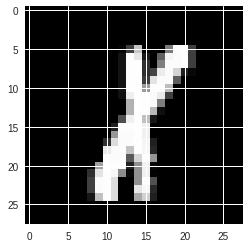

----------------------------
[9. 4.]


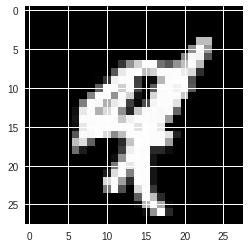

----------------------------


In [0]:
for i in range(5):
    
    
    print(y_merged[i])
    
    plt.imshow(x_merged[i].reshape(28, 28))
    plt.gray()
    plt.show()
    
    print("----------------------------")

In [0]:
model = Sequential()

#1st convolution layer
model.add(Conv2D(16, (3, 3), padding='same', input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#2nd convolution layer
model.add(Conv2D(32,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Conv2D(32,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='sigmoid'))

In [0]:
y_train=keras.utils.to_categorical(y_train, num_classes=10)
y_test=keras.utils.to_categorical(y_test, num_classes=10)

In [0]:
y_data=np.copy(y_train)
y_data=y_data.astype(int)
y_data=np.bitwise_or(y_data[0:40000],y_data[5:40005])

In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
model.fit(x_merged,y_data, epochs=3)

Epoch 1/3
40000/40000 [==============================] - 14s 359us/step - loss: 0.1885
Epoch 2/3
40000/40000 [==============================] - 10s 262us/step - loss: 0.1143
Epoch 3/3
40000/40000 [==============================] - 11s 263us/step - loss: 0.0949


In [0]:
model.predict(x_merged[0:5])

array([[9.3824950e-05, 3.0226677e-03, 9.9976462e-01, 1.0678021e-03,
        2.2648857e-04, 9.8729229e-01, 3.4401201e-05, 1.0022216e-02,
        1.9742580e-02, 2.2223490e-04],
       [9.9940562e-01, 9.9920720e-01, 1.9389689e-03, 3.7251459e-04,
        8.3239975e-05, 2.9335634e-04, 1.8615047e-04, 2.0692180e-04,
        1.4096181e-03, 6.1892899e-04],
       [1.0315689e-04, 5.5658940e-04, 2.9621189e-02, 9.9588579e-01,
        9.6129775e-01, 1.4306221e-02, 1.6703492e-05, 1.1703251e-01,
        4.6340172e-04, 1.5430812e-02],
       [3.0203684e-05, 9.9999690e-01, 9.9658435e-05, 4.9359205e-06,
        1.6687935e-02, 4.0632262e-05, 3.1737078e-04, 2.4438373e-04,
        2.7773850e-02, 8.1735954e-05],
       [2.0677658e-06, 1.0315250e-02, 4.3659489e-05, 1.5521751e-07,
        9.9852008e-01, 1.0229205e-04, 2.6239140e-04, 8.6722178e-03,
        5.2427519e-03, 9.4927418e-01]], dtype=float32)

In [0]:
x_temp=np.zeros(x_train[0:10].shape)
x_temp[0]=x_train[1]
x_temp[1]=x_train[8]
x_temp[2]=x_train[5]
x_temp[3]=x_train[7]
x_temp[4]=x_train[2]
x_temp[5]=x_train[0]
x_temp[6]=x_train[13]
x_temp[7]=x_train[15]
x_temp[8]=x_train[8]
x_temp[9]=x_train[4]


In [0]:
generate = Sequential()

generate.add(Dense(49, activation='relu', input_dim=1))
generate.add(keras.layers.Reshape((7, 7, 1), input_shape=(49,)))

generate.add(Conv2D(32,(3, 3), padding='same'))
generate.add(Activation('relu'))
generate.add(UpSampling2D((2, 2)))


generate.add(Conv2D(16,(3, 3), padding='same'))
generate.add(Activation('relu'))
generate.add(UpSampling2D((2, 2)))


generate.add(Conv2D(1,(3, 3), padding='same'))
generate.add(Activation('sigmoid'))


In [0]:
generate.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
y_digits=np.zeros(y_train.shape[0])
y_predict=model.predict(x_merged)
y_pred1=np.zeros(y_predict.shape[0])
y_pred2=np.zeros(y_predict.shape[0])
x_check=np.zeros([y_digits.shape[0],28,28,1])
ctr=0
for i in range(len(y_train[0:40000])):
    y_digits[i]=np.argmax(y_train[i])
    y_pred1[i]=np.argmax(y_predict[i])
    y_predict[i,np.argmax(y_predict[i])]=0
    y_pred2[i]=np.argmax(y_predict[i])
    x_check[i]=x_temp[int(y_digits[i])]


In [0]:
print(y_pred1[0],y_pred2[0])

2.0 5.0


In [0]:
generate.fit(y_digits,x_check, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 13s 212us/step - loss: 0.1076
Epoch 2/3
60000/60000 [==============================] - 12s 208us/step - loss: 0.1039
Epoch 3/3
60000/60000 [==============================] - 12s 208us/step - loss: 0.1009


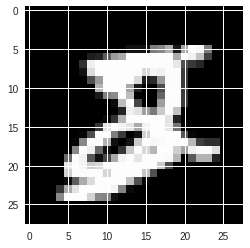

2.0 5.0


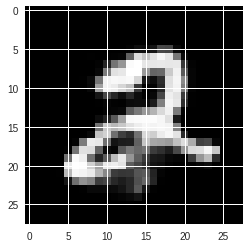

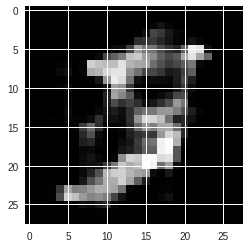

----------------------------


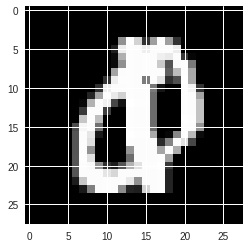

0.0 1.0


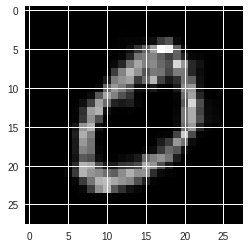

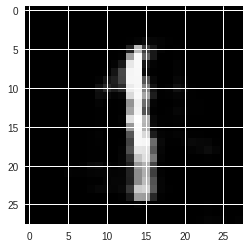

----------------------------


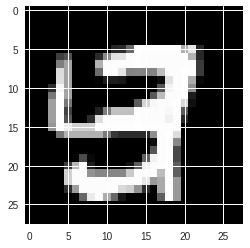

3.0 4.0


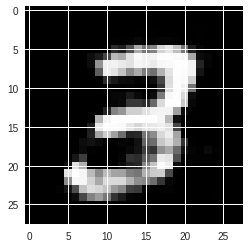

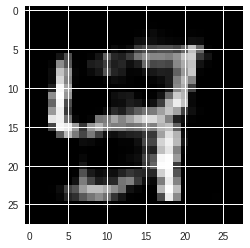

----------------------------


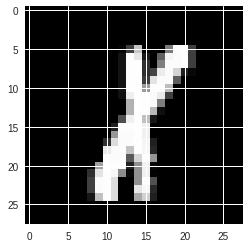

1.0 8.0


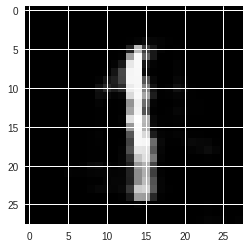

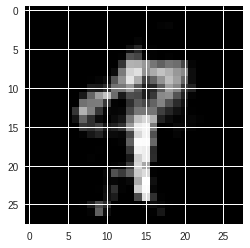

----------------------------


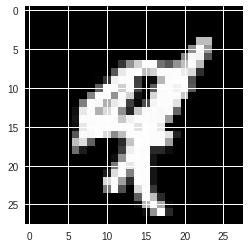

4.0 9.0


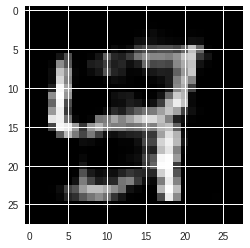

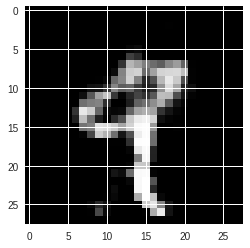

----------------------------


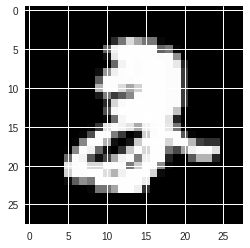

2.0 3.0


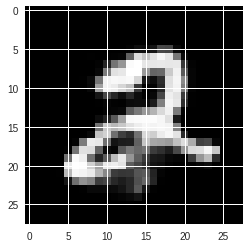

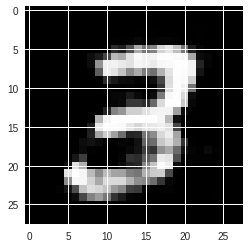

----------------------------


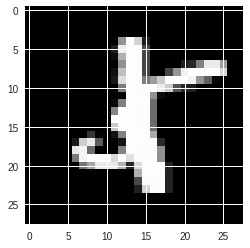

5.0 1.0


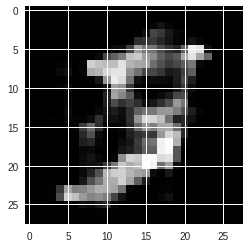

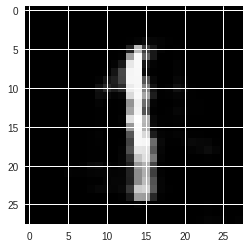

----------------------------


In [0]:
x_pred1=generate.predict(y_pred1[0:7])
x_pred2=generate.predict(y_pred2[0:7])

for i in range(7):
    
    plt.imshow(x_merged[i].reshape(28, 28))
    plt.gray()
    plt.show()
    
    print(y_pred1[i], y_pred2[i])
    
    plt.imshow(x_pred1[i].reshape(28, 28))
    plt.gray()
    plt.show()
    
    plt.imshow(x_pred2[i].reshape(28, 28))
    plt.gray()
    plt.show()
    
    print("----------------------------")
